In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

stock_price = pd.read_csv(r'D:\Nishchal\Excelr Data Science\Project\Stock_Market_Analysis\Dataset\AAPL.csv')
stock_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [2]:
stock_price.shape

(2011, 7)

In [3]:
stock_price.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [4]:
stock_price.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:

stock_price_preprocessed = stock_price.drop_duplicates(subset=['Date'], keep='first')

stock_price_preprocessed.shape#There are noo duplicates or null values in the dataset

(2011, 7)

In [6]:
stock_price_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [7]:
#Type casting date column from Object to datetime
stock_price_preprocessed['Date'] = pd.to_datetime(stock_price_preprocessed['Date'], format="%Y-%m-%d") #changing the datatype of the date column from object to datetime
stock_price_preprocessed.info() #cross checking the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2011 non-null   datetime64[ns]
 1   Open       2011 non-null   float64       
 2   High       2011 non-null   float64       
 3   Low        2011 non-null   float64       
 4   Close      2011 non-null   float64       
 5   Adj Close  2011 non-null   float64       
 6   Volume     2011 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 110.1 KB


In [8]:
stock_price_preprocessed.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2011,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,2016-01-01 03:10:28.344107520,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
min,2012-01-03 00:00:00,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,2014-01-02 12:00:00,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,2015-12-31 00:00:00,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,2017-12-28 12:00:00,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,2019-12-30 00:00:00,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08
std,NaN,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07


In [9]:
corelation = stock_price_preprocessed.corr(numeric_only=True)
corelation

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999782,0.999718,0.999496,0.998895,-0.557956
High,0.999782,1.000000,0.999657,0.999748,0.999171,-0.554909
Low,0.999718,0.999657,1.000000,0.999769,0.999179,-0.563426
Close,0.999496,0.999748,0.999769,1.000000,0.999402,-0.559654
Adj Close,0.998895,0.999171,0.999179,0.999402,1.000000,-0.566332
Volume,-0.557956,-0.554909,-0.563426,-0.559654,-0.566332,1.000000


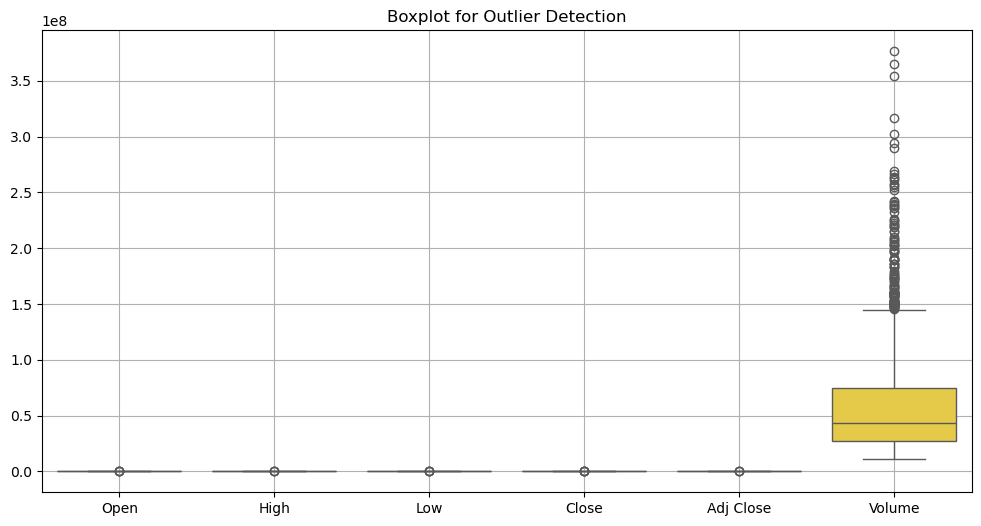

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(data=stock_price_preprocessed[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']], palette='Set2')
plt.title('Boxplot for Outlier Detection')
plt.grid()
plt.show()
#The volume column has a lot of outliers. So the column is being dropped for model building

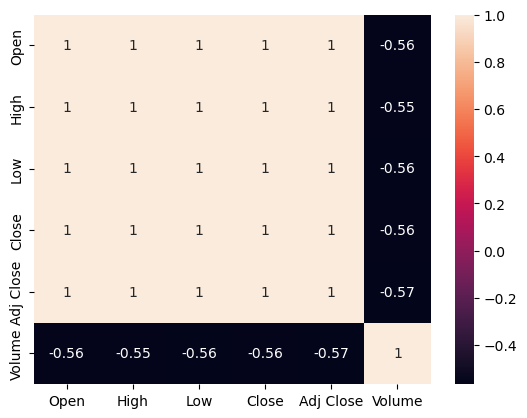

In [11]:
sns.heatmap(corelation,annot=True)
plt.show()

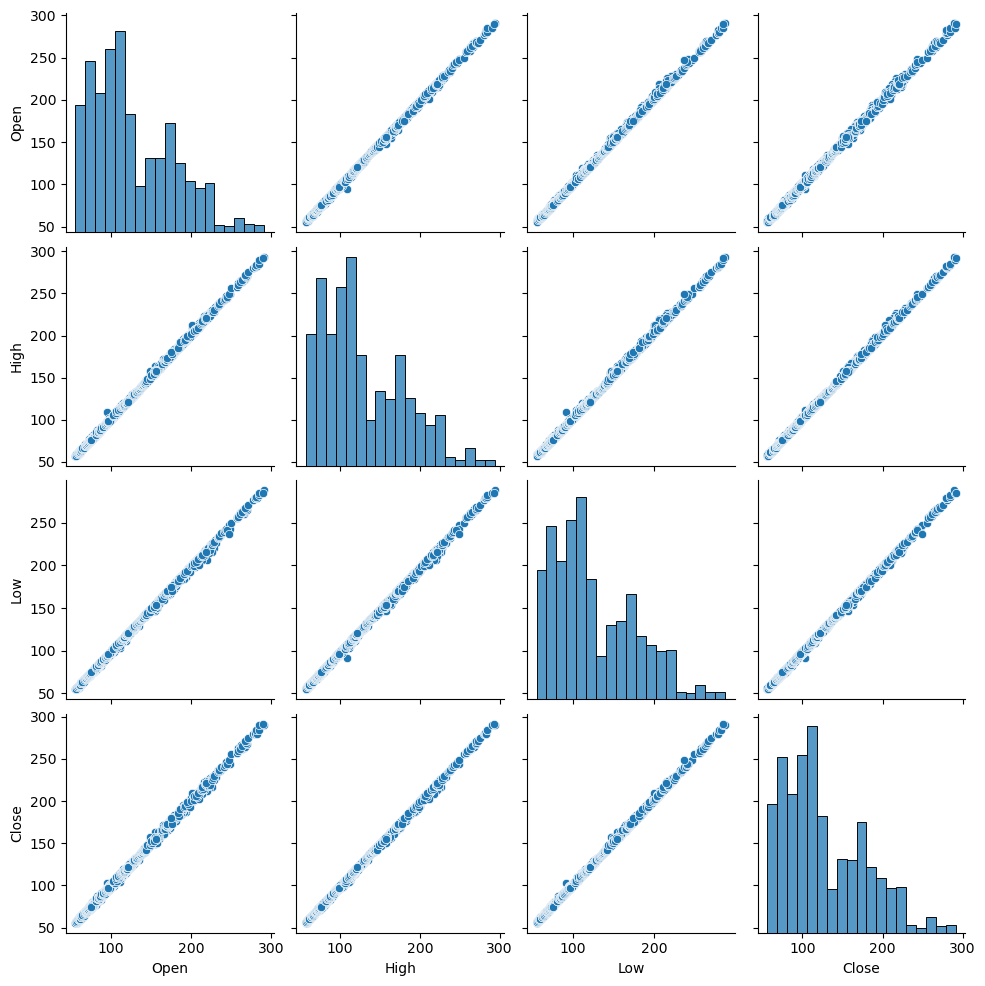

In [12]:
sns.pairplot(stock_price_preprocessed[['Open', 'High', 'Low', 'Close']])
plt.show()

In [13]:
##Making Date as Index 
stock_price_preprocessed.set_index('Date',inplace=True)

In [14]:
stock_price_preprocessed['Date'] = stock_price_preprocessed.index

In [15]:
stock_price_preprocessed.head()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,2012-01-03
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,2012-01-04
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,2012-01-05
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,2012-01-06
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,2012-01-09


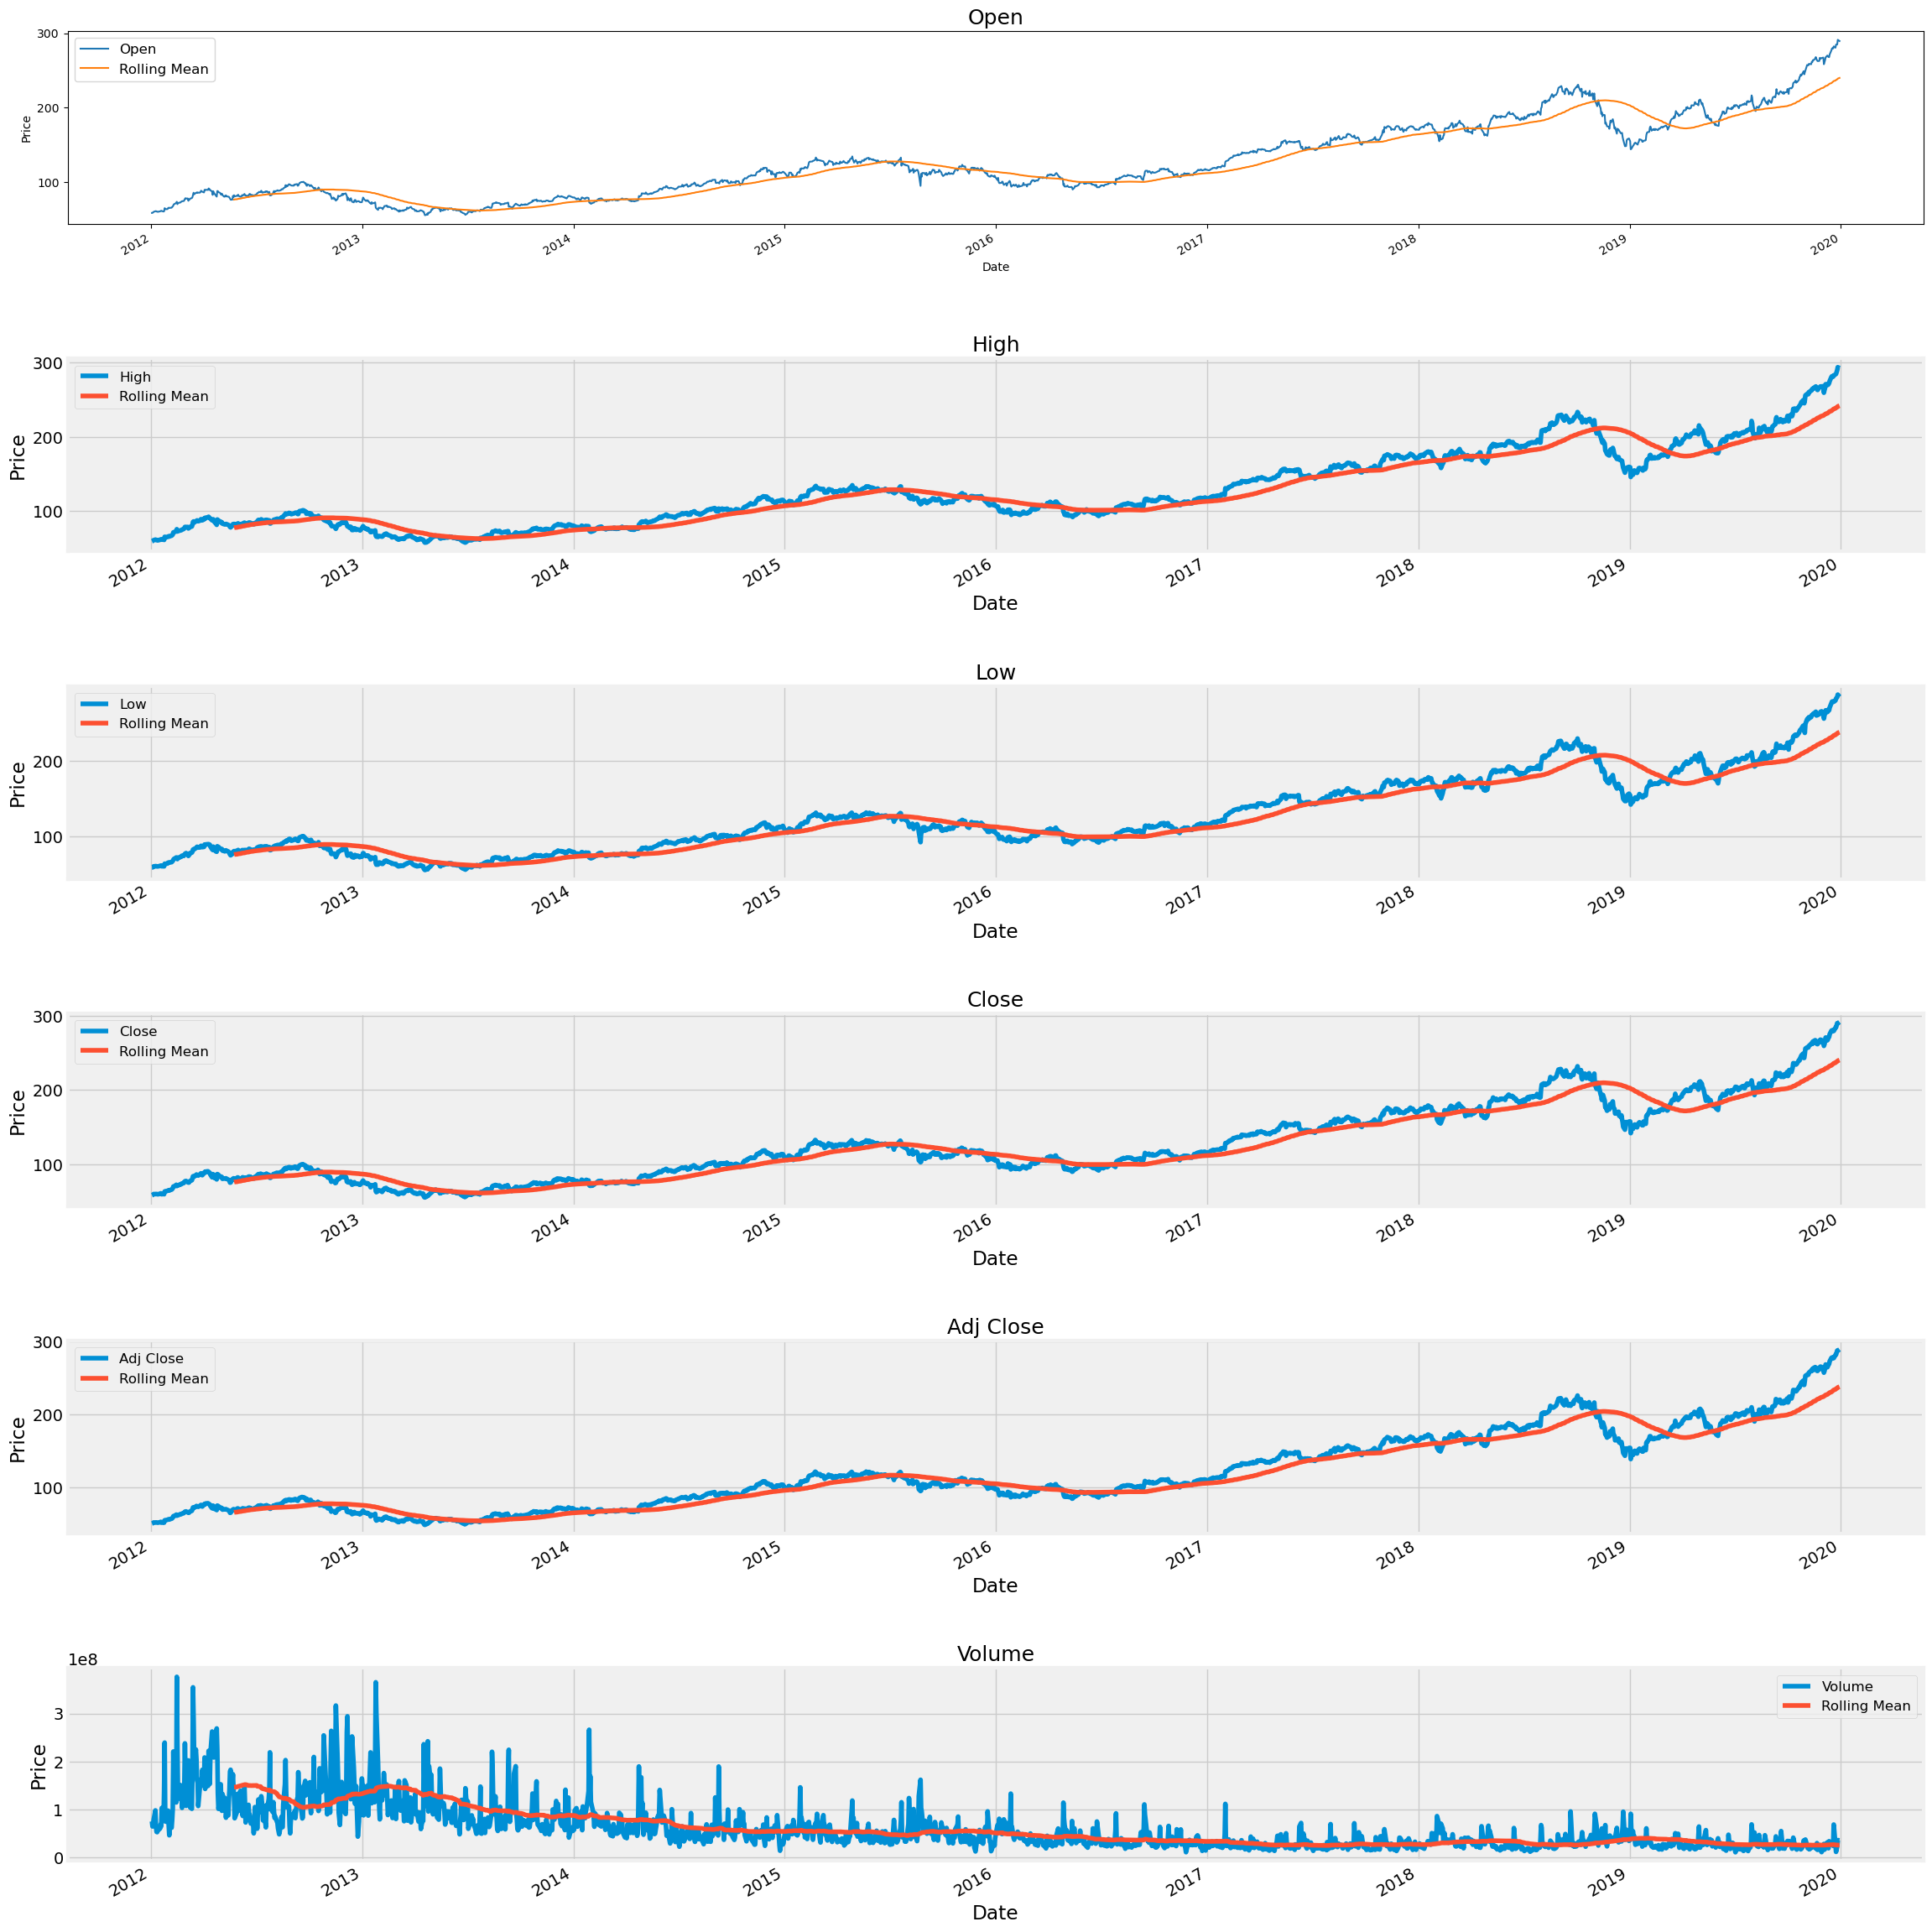

In [16]:
col_names = stock_price_preprocessed.columns

fig = plt.figure(figsize=(24, 24))
for i in range(6):
  ax = fig.add_subplot(6,1,i+1)
  ax.plot(stock_price_preprocessed.iloc[:,i],label=col_names[i])
  stock_price_preprocessed.iloc[:,i].rolling(100).mean().plot(label='Rolling Mean')
  ax.set_title(col_names[i],fontsize=18)
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')
  ax.patch.set_edgecolor('black')  
  plt.style.context('fivethirtyeight')
  plt.legend(prop={'size': 12})
  plt.style.use('fivethirtyeight')

fig.tight_layout(pad=3.0)

plt.show()

In [17]:
##Data after feature selection
data_feature_selected = stock_price_preprocessed.drop(axis=1,labels=['Open','High','Low','Close','Volume'])

In [18]:
col_order = ['Date','Adj Close']
data_feature_selected = data_feature_selected.reindex(columns=col_order)
data_feature_selected

,Date,Adj Close
Date,,
2012-01-03,2012-01-03,50.765709
2012-01-04,2012-01-04,51.038536
2012-01-05,2012-01-05,51.605175
2012-01-06,2012-01-06,52.144630
2012-01-09,2012-01-09,52.061932
...,...,...
2019-12-23,2019-12-23,282.054138
2019-12-24,2019-12-24,282.322266
2019-12-26,2019-12-26,287.923645


In [19]:
##Resample Data to Monthly instead of Daily by Aggregating Using Mean
monthly_mean = data_feature_selected['Adj Close'].resample('M').mean()

C:\Users\Nishchal\AppData\Local\Temp\ipykernel_1724\1566640463.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean = data_feature_selected['Adj Close'].resample('M').mean()


In [20]:
monthly_data = monthly_mean.to_frame()
monthly_data

,Adj Close
Date,
2012-01-31,52.907298
2012-02-29,61.424381
2012-03-31,71.292448
2012-04-30,74.810151
2012-05-31,69.708045
...,...
2019-08-31,202.738817
2019-09-30,215.853332
2019-10-31,232.974974


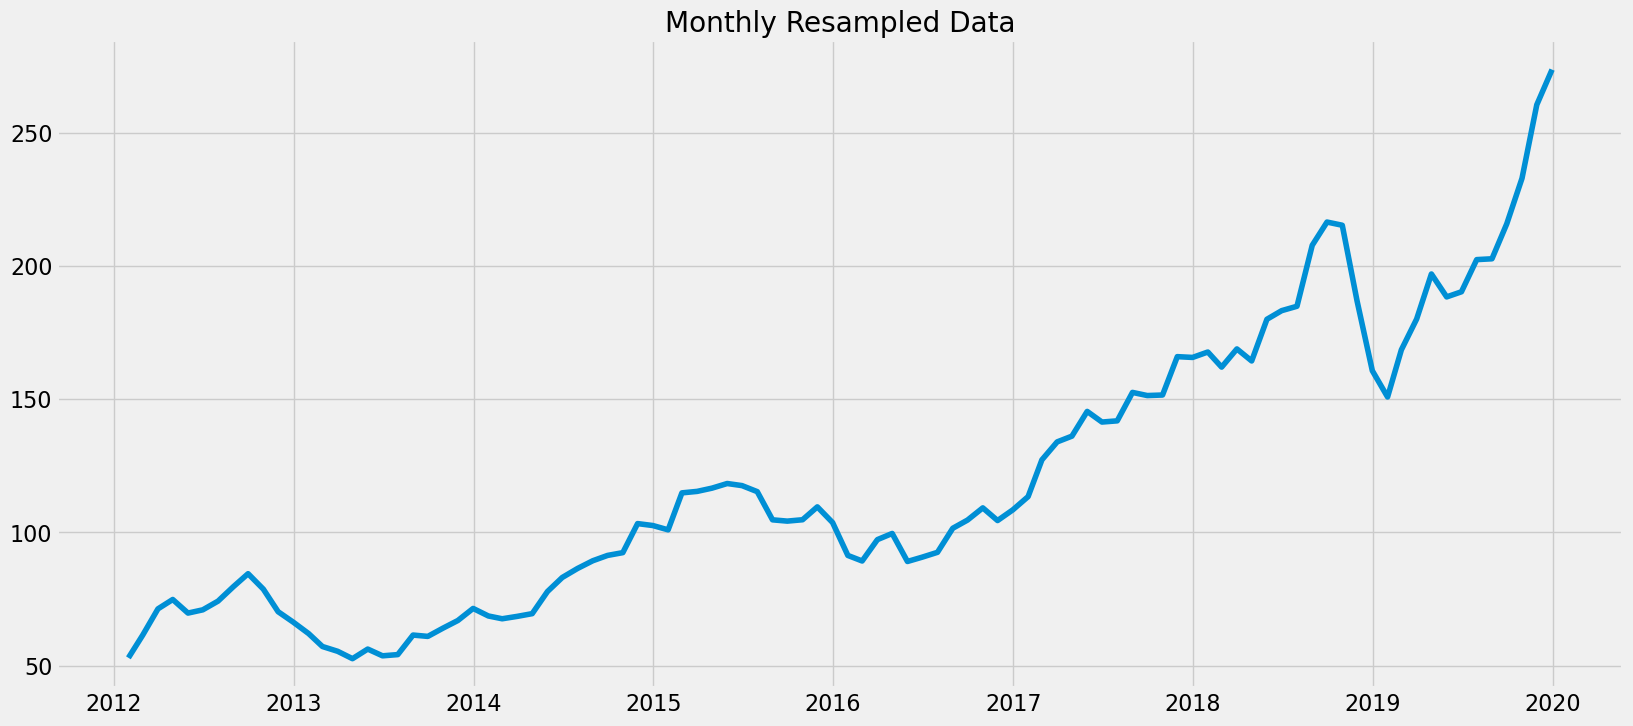

In [21]:
plt.figure(figsize=(18,8))
plt.plot(monthly_data['Adj Close'],label='Monthly Averages Apple Stock')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Monthly Resampled Data")
plt.show()

C:\Users\Nishchal\AppData\Local\Temp\ipykernel_1724\3762821286.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(monthly_data['Adj Close']).set_title("Distribution Plot Adj Close -AAPL")


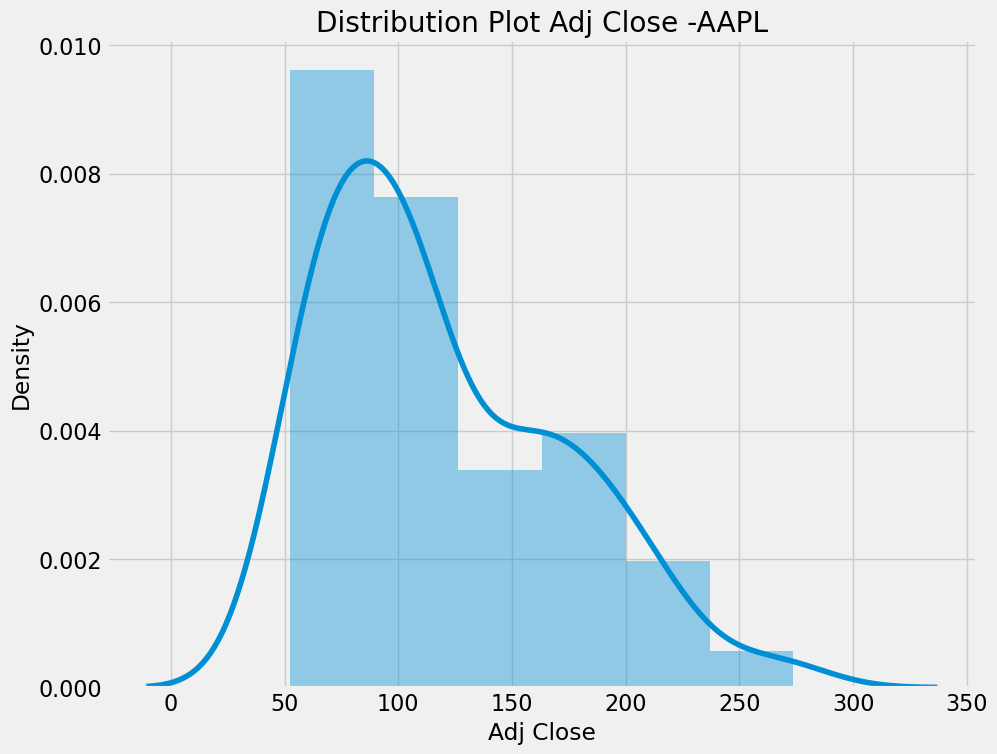

In [22]:
plt.figure(figsize=(10,8))
sns.distplot(monthly_data['Adj Close']).set_title("Distribution Plot Adj Close -AAPL")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

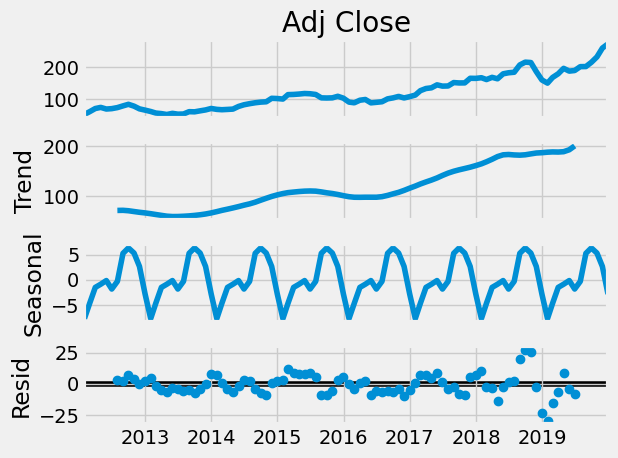

<Figure size 2000x1000 with 0 Axes>

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose as sd

decomposed_series = sd(monthly_data['Adj Close'],model='additive',period=12)
decomposed_series.plot()
plt.figure(figsize=(20,10))
plt.show()

In [24]:
from statsmodels.tsa.stattools import adfuller

# Run ADF test on each column separately
col = ['Adj Close']
result = adfuller(monthly_data[col].dropna())  # Drop NaN values before passing

print(f"ADF Test for {col}:")
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print(f"Lags Used: {result[2]}")
print(f"Number of Observations Used: {result[3]}")
print(f"Critical Values: {result[4]}\n")

# Interpretation
if result[1] <= 0.05:  # p-value
    print(f"{col}: Reject the null hypothesis. The time series is stationary.\n")
else:
    print(f"{col}: Fail to reject the null hypothesis. The time series is non-stationary.\n")

ADF Test for ['Adj Close']:
ADF Statistic: 1.3392534134075522
p-value: 0.9968199243497511
Lags Used: 3
Number of Observations Used: 92
Critical Values: {'1%': -3.503514579651927, '5%': -2.893507960466837, '10%': -2.583823615311909}

['Adj Close']: Fail to reject the null hypothesis. The time series is non-stationary.



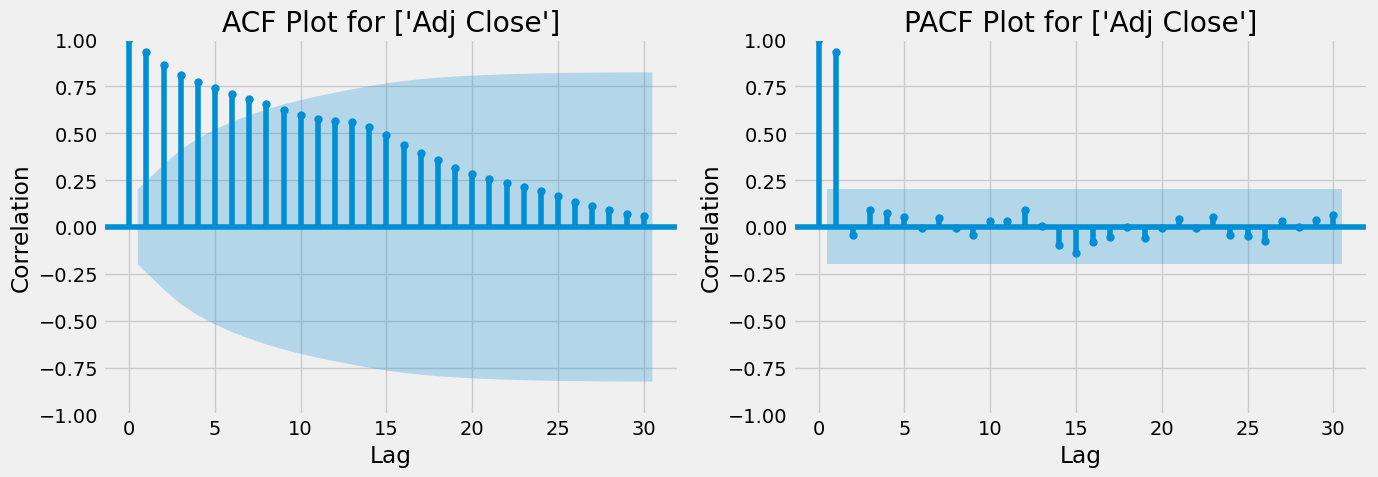

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

col = ['Adj Close']

fig, axes = plt.subplots(1, 2, figsize=(14,5))  # 1 row, 2 columns for ACF & PACF

# ACF plot
plot_acf(monthly_data[col].dropna(), lags=30, ax=axes[0])
axes[0].set_title(f'ACF Plot for {col}')
axes[0].set_xlabel('Lag')
axes[0].set_ylabel('Correlation')

# PACF plot
plot_pacf(monthly_data[col].dropna(), lags=30, method='ywm', ax=axes[1])
axes[1].set_title(f'PACF Plot for {col}')
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('Correlation')

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

In [26]:
# Differencing for stationarity as timeseries is non-stationary
monthly_diff = monthly_data[['Adj Close']].diff().dropna()

In [27]:
# Run ADF test on each column separately
col = ['Adj Close']
result = adfuller(monthly_diff[col].dropna())  # Drop NaN values before passing

print(f"ADF Test for {col}:")
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print(f"Lags Used: {result[2]}")
print(f"Number of Observations Used: {result[3]}")
print(f"Critical Values: {result[4]}\n")

# Interpretation
if result[1] <= 0.05:  # p-value
    print(f"{col}: Reject the null hypothesis. The time series is stationary.\n")
else:
    print(f"{col}: Fail to reject the null hypothesis. The time series is non-stationary.\n")

ADF Test for ['Adj Close']:
ADF Statistic: -6.5018645334054685
p-value: 1.1564978775248011e-08
Lags Used: 0
Number of Observations Used: 94
Critical Values: {'1%': -3.5019123847798657, '5%': -2.892815255482889, '10%': -2.583453861475781}

['Adj Close']: Reject the null hypothesis. The time series is stationary.



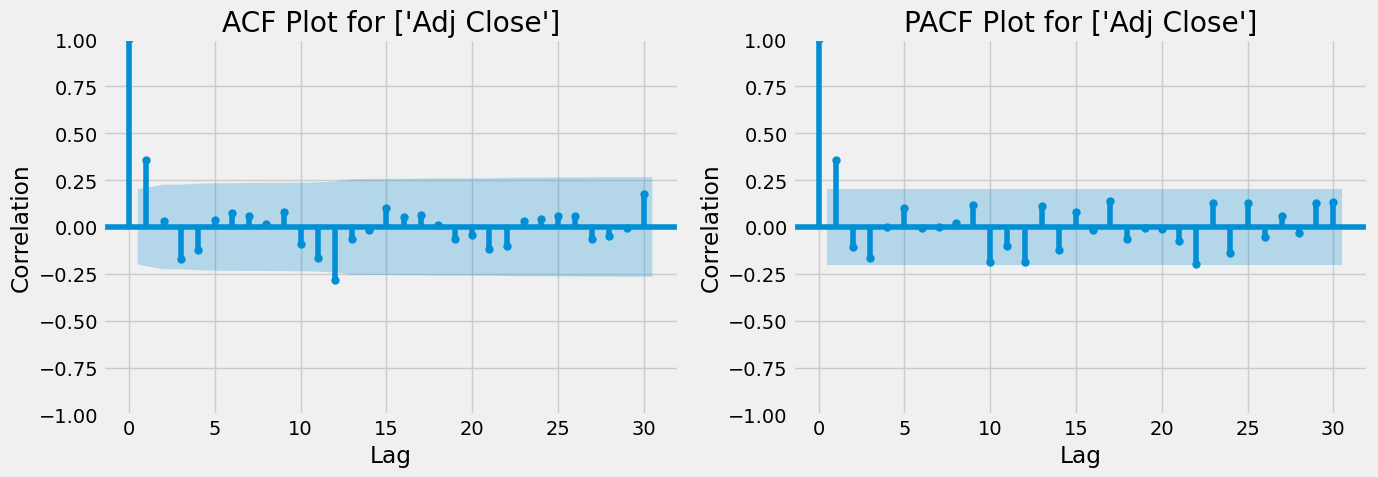

In [28]:
col = ['Adj Close']

fig, axes = plt.subplots(1, 2, figsize=(14,5))  # 1 row, 2 columns for ACF & PACF

# ACF plot
plot_acf(monthly_diff[col].dropna(), lags=30, ax=axes[0])
axes[0].set_title(f'ACF Plot for {col}')
axes[0].set_xlabel('Lag')
axes[0].set_ylabel('Correlation')

# PACF plot
plot_pacf(monthly_diff[col].dropna(), lags=30, method='ywm', ax=axes[1])
axes[1].set_title(f'PACF Plot for {col}')
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('Correlation')

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

In [29]:
modelling_series = monthly_data['Adj Close']
modelling_series

Date
2012-01-31     52.907298
2012-02-29     61.424381
2012-03-31     71.292448
2012-04-30     74.810151
2012-05-31     69.708045
                 ...    
2019-08-31    202.738817
2019-09-30    215.853332
2019-10-31    232.974974
2019-11-30    260.569057
2019-12-31    273.780717
Freq: ME, Name: Adj Close, Length: 96, dtype: float64

In [30]:
from sklearn.model_selection import train_test_split

# train,test  = train_test_split(modelling_series,train_size=0.6,shuffle=False)
training = modelling_series.loc['2012-01-01':'2018-12-31']
testing = modelling_series.loc['2019-01-01':'2019-12-31']


<Figure size 640x480 with 0 Axes>

Observations: 48
Training Observations: 24
Testing Observations: 24
Observations: 72
Training Observations: 48
Testing Observations: 24
Observations: 96
Training Observations: 72
Testing Observations: 24


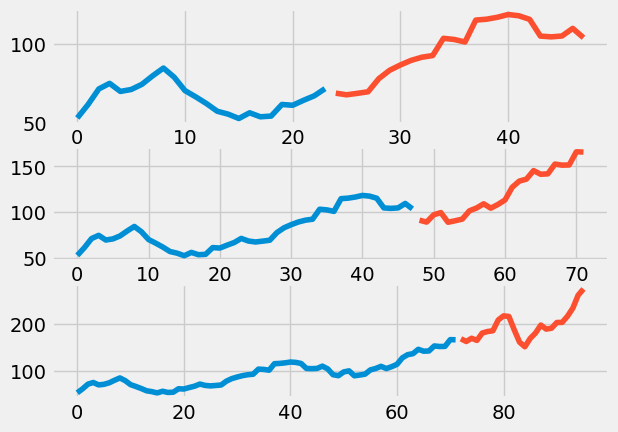

In [31]:
from sklearn.model_selection import TimeSeriesSplit

## Using TimeSeriesSplit from sklearn library
time_series_splits = TimeSeriesSplit(n_splits=3)
X = modelling_series.values
plt.figure(1)
plt.show()

index = 1
for train_index, test_index in time_series_splits.split(X):
    train = X[train_index]
    test = X[test_index]
    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    plt.subplot(310 + index)
    plt.plot(train)
    plt.plot([None for i in train] + [x for x in test])
    # pyplot.title(''.format())
    index += 1
plt.show()

In [32]:
train_list = {}
test_list = {}
time_series_splits = TimeSeriesSplit(n_splits=5)
X = modelling_series.values

index = 1
for train_index, test_index in time_series_splits.split(X):
    train = X[train_index]
    test = X[test_index]
    train_list[index] = train
    test_list[index] = test
    index += 1

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def backtest_model(train,test):
    model = SARIMAX(train,order=(1,1,1),seasonal_order=(2,2,0,12))
    results=model.fit()
    
    
    # train_get_dates_beginning = '2012-01-31'
    # train_get_dates_ending = str(modelling_series.index[len(train)].date())
    # test_get_dates_beginning = train_get_dates_ending
    # test_get_dates_ending = str(modelling_series.index[len(train)+len(test)].date())
    
    
    # forecasts_train = results.predict(start=train_get_dates_beginning,end=train_get_dates_ending)
    # forecasts_test = results.predict(start=test_get_dates_beginning,end=test_get_dates_ending)
    
    forecasts_train = results.predict(start=0,end=len(train))
    forecasts_test = results.predict(start=len(train),end=len(train)+len(test))
    
    
    fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))
    
    train = pd.DataFrame(train)
    test = pd.DataFrame(test)
    
    forecasts_train = pd.DataFrame(forecasts_train)
    forecasts_test = pd.DataFrame(forecasts_test)
    
    
    ax1.plot(train.index, train, label='Actual Train Data', color='blue')
    ax1.plot(forecasts_train.index, forecasts_train, label='SARIMA Forecast', color='red')
    ax1.set_title('SARIMA Forecasting - Train Data')
    ax1.set_ylabel('Stock Price')
    ax1.set_xlabel('Time')
    ax1.legend() 
    
    # Plot Testing Data
    ax2.plot(test.index, test, label='Actual Test Data', color='blue')
    ax2.plot(forecasts_test.index, forecasts_test, label='SARIMA Forecast', color='red')
    ax2.set_title('SARIMA Forecasting - Test Data')
    ax2.set_ylabel('Stock Price')
    ax2.set_xlabel('Time')
    ax2.legend()
    
    plt.tight_layout(pad=2)
    plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Nishchal\AppData\Roaming\Python\Python312\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Nishchal\AppData\Roaming\Python\Python312\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrm

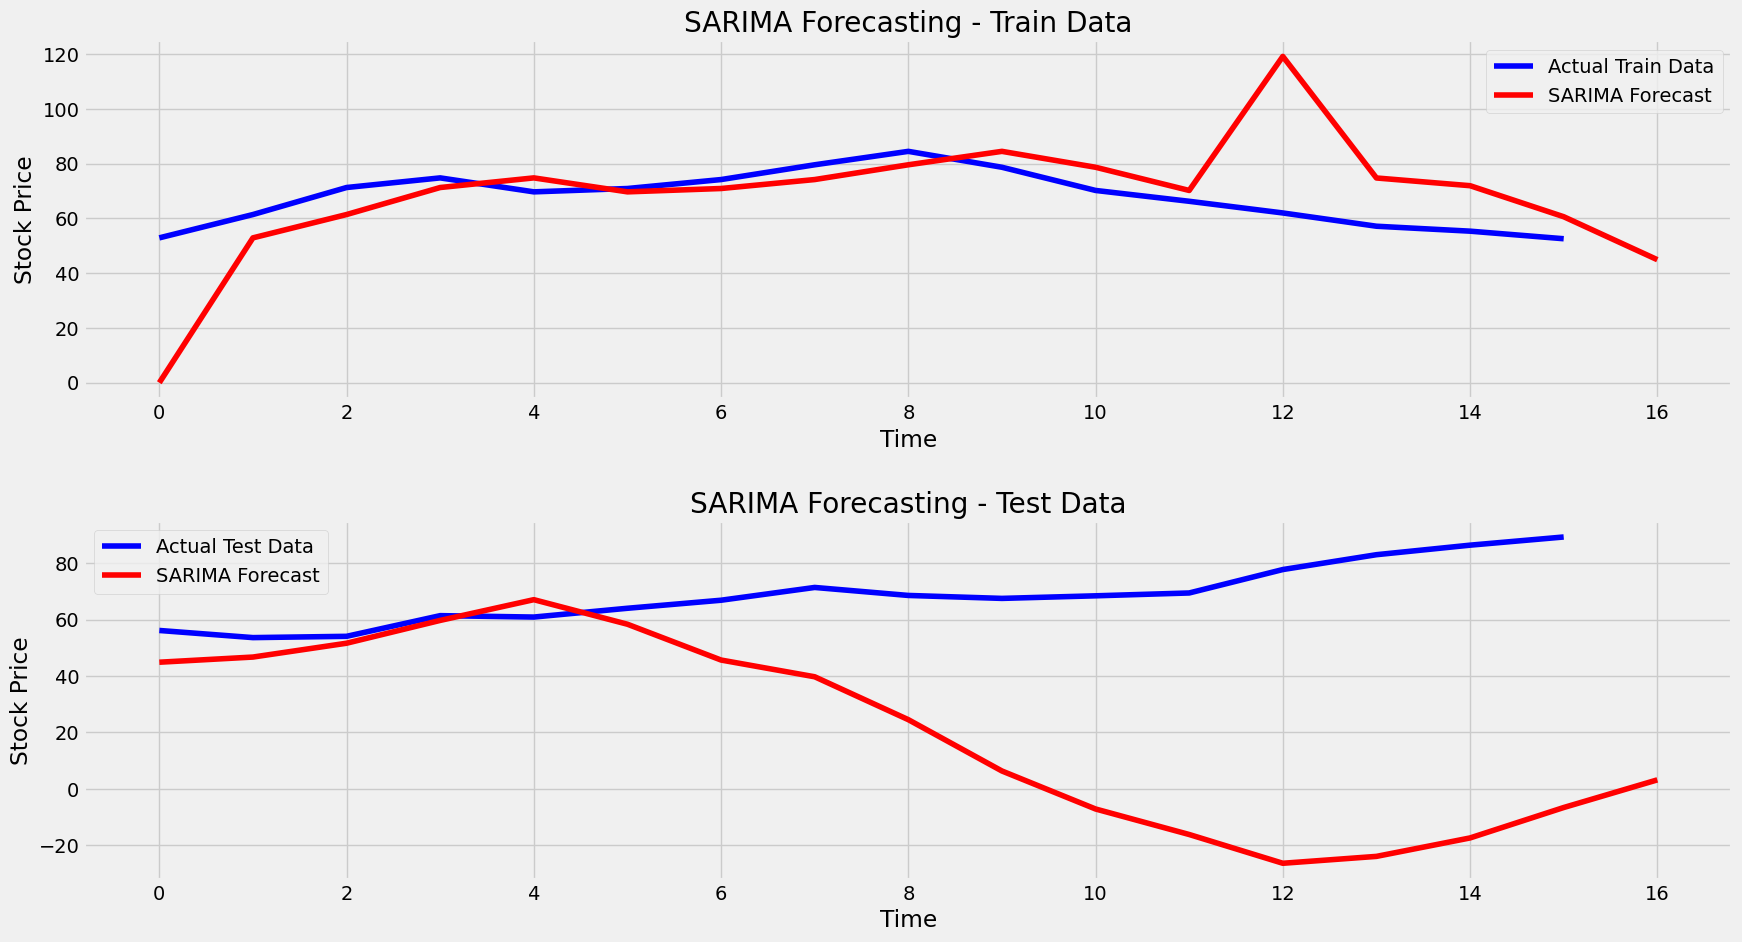

In [34]:
# Backtest Set-1
backtest_model(train_list[1],test_list[1])

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


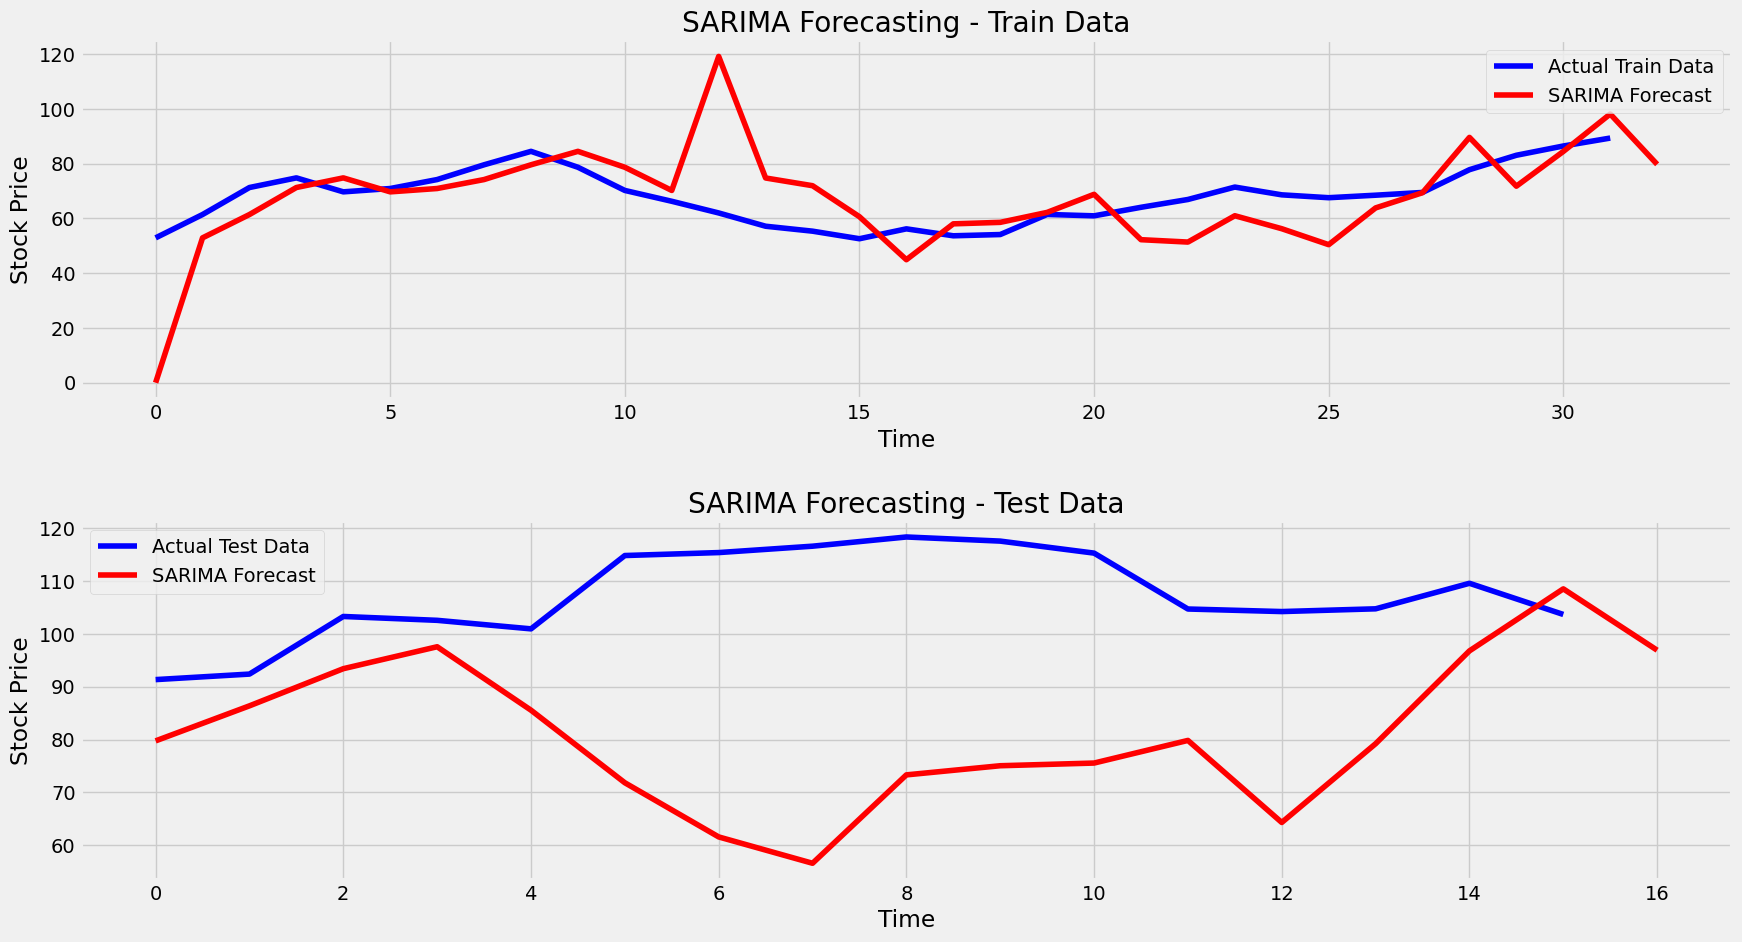

In [35]:
# Backtest Set-2
backtest_model(train_list[2],test_list[2])

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


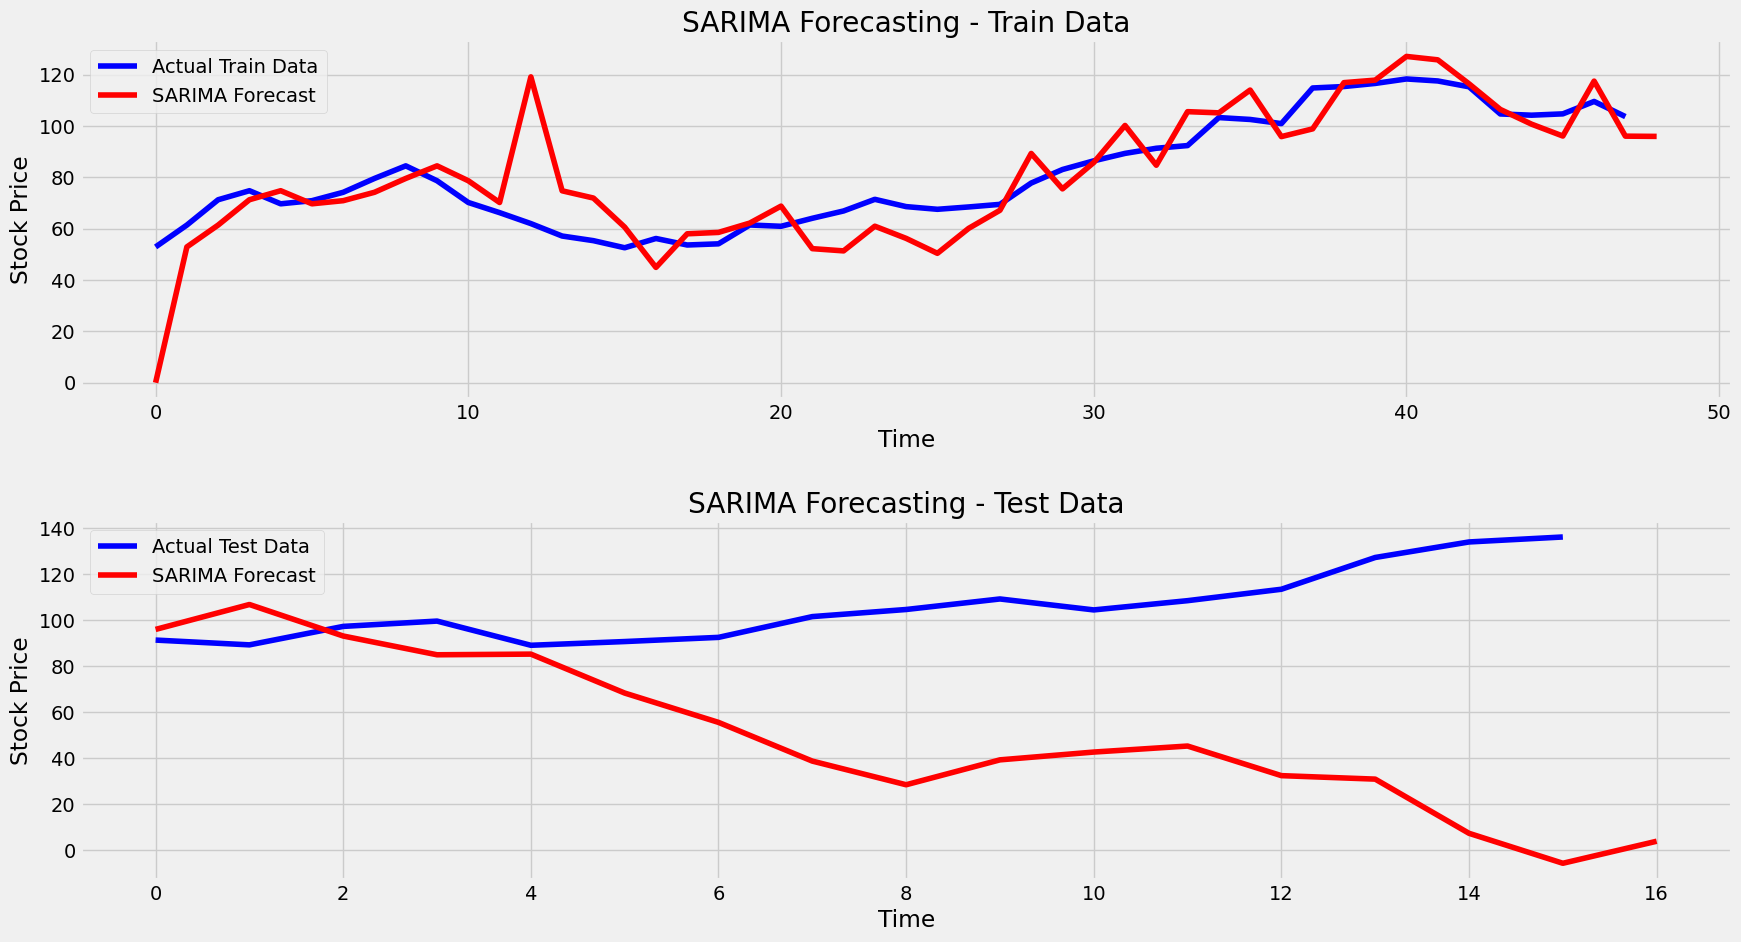

In [36]:
# Backtest Set-3
backtest_model(train_list[3],test_list[3])

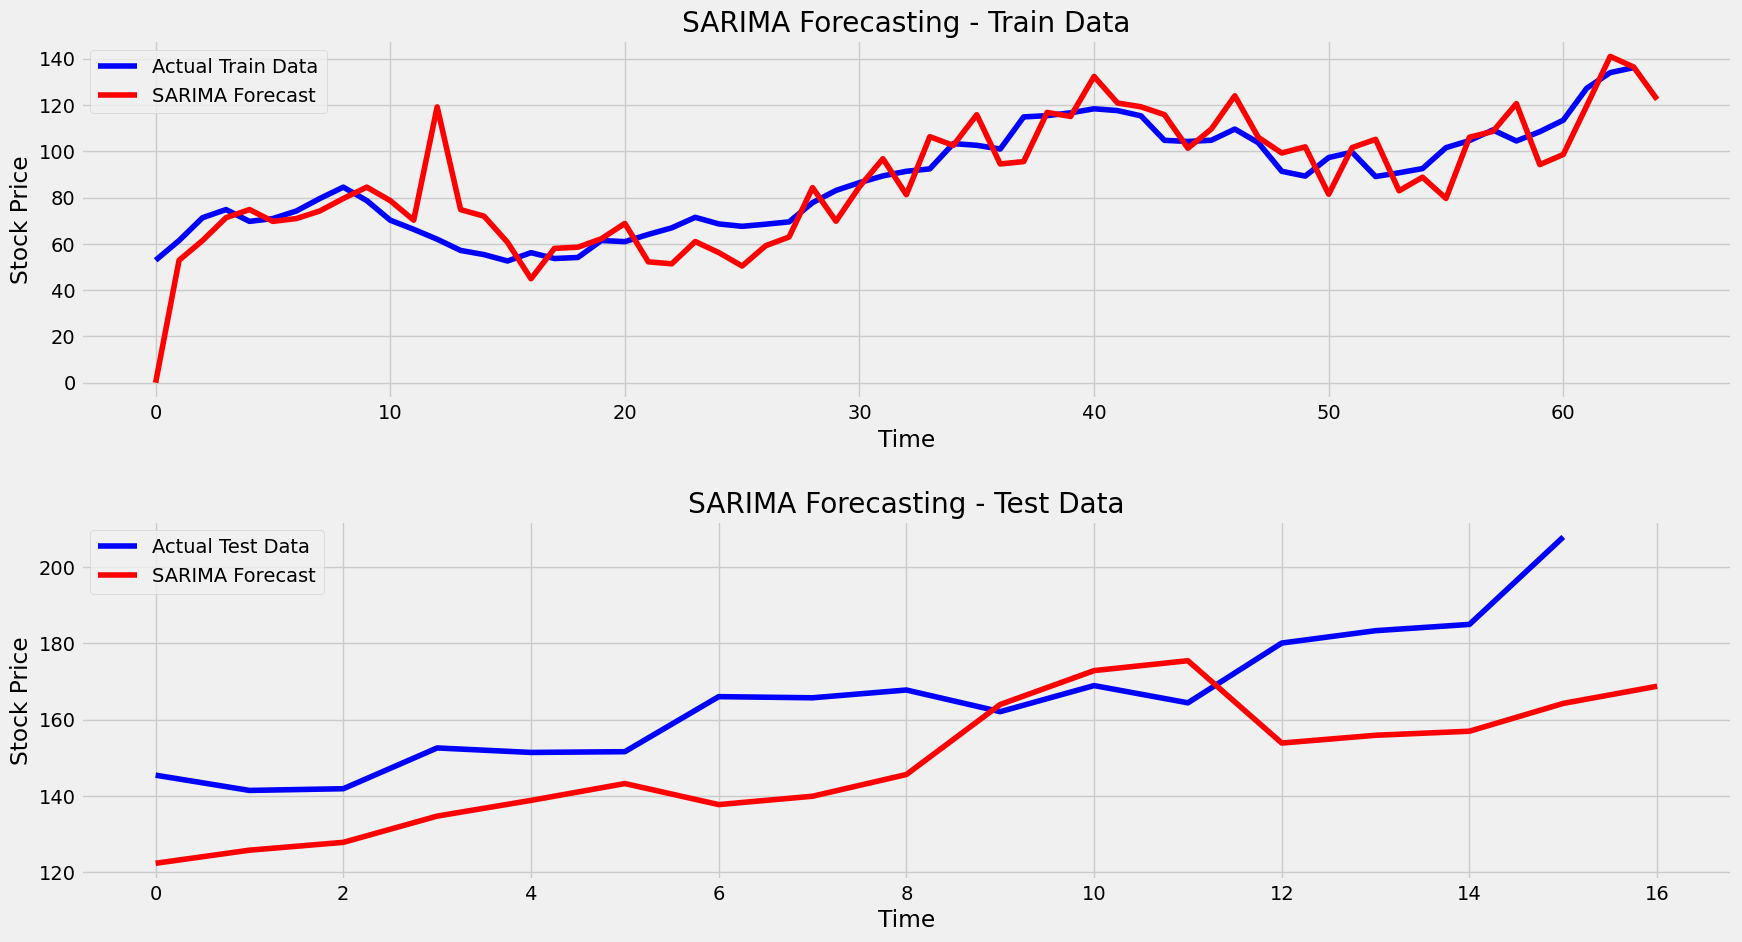

In [37]:
# Backtest Set-4
backtest_model(train_list[4],test_list[4])

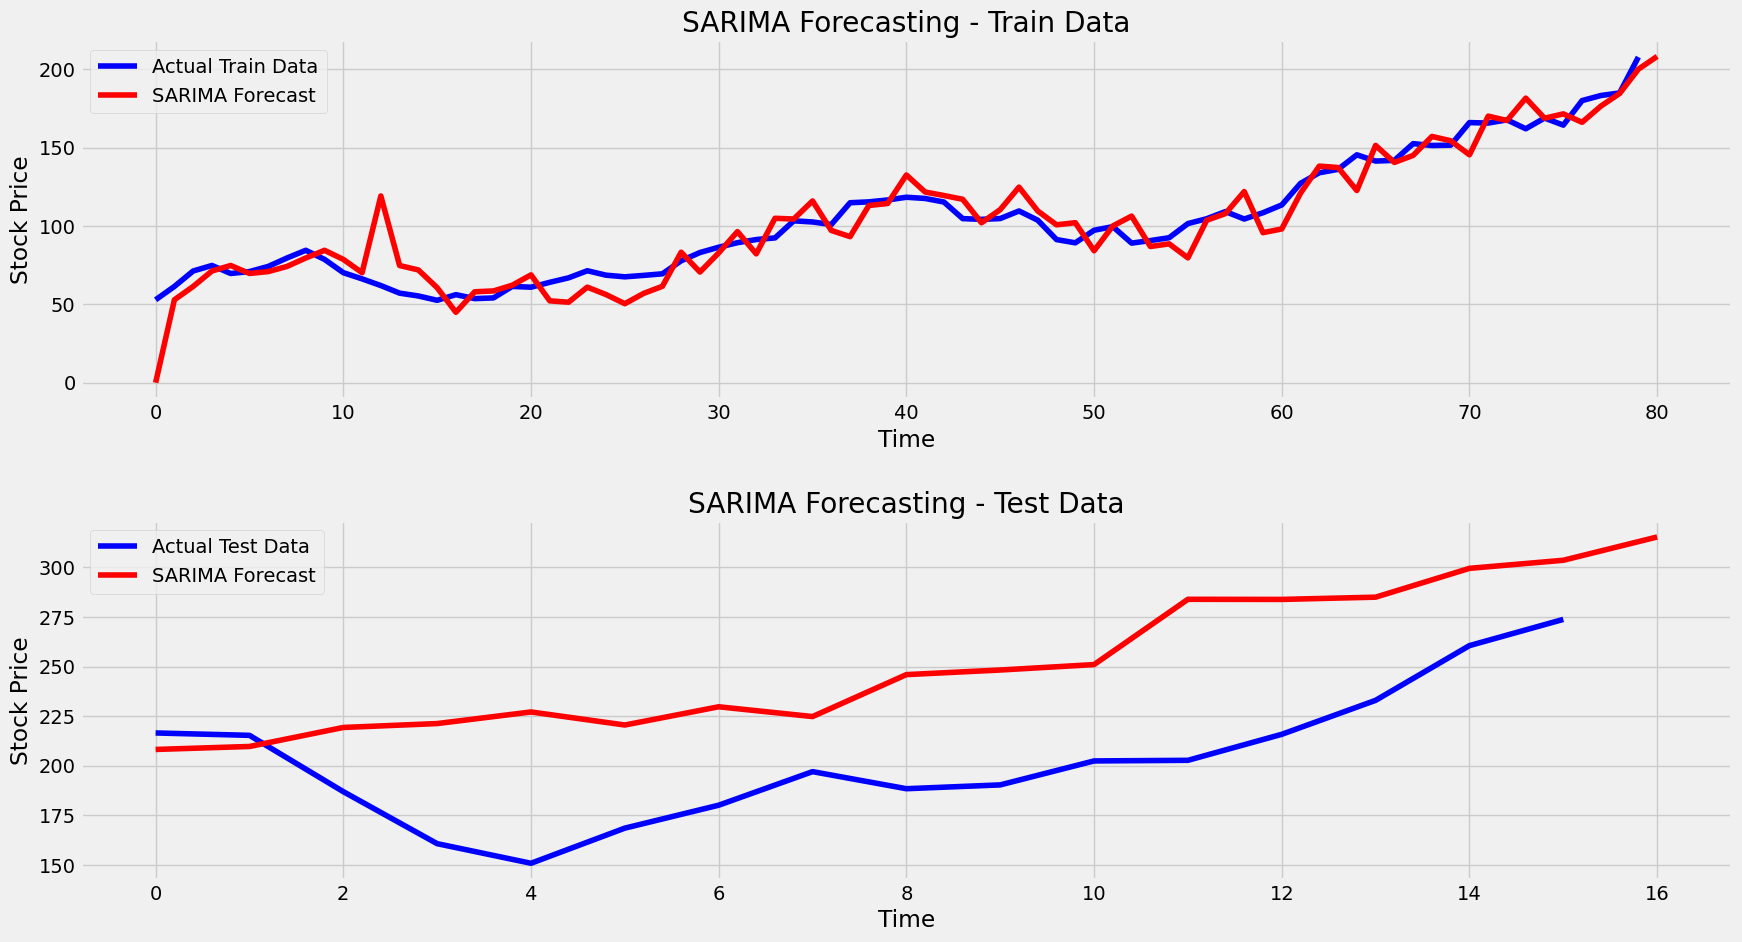

In [38]:
# Backtest Set-5
backtest_model(train_list[5],test_list[5])

In [39]:
# Forecasting Seasonal ARIMA

model = SARIMAX(training,order=(1,1,1),seasonal_order=(2,2,0,12))
results=model.fit()

In [40]:
forecasts_train = results.predict(start='2012-01-31',end='2018-12-31')
forecasts_test = results.predict(start='2019-01-31',end='2019-12-31')

In [41]:
# Metrics for Training data
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import numpy as np
print('R2 Score : ',r2_score(training,forecasts_train))
print('Mean Squared Error : ',mean_squared_error(training,forecasts_train))
print('Mean Absolute Error : ',mean_absolute_error(training,forecasts_train))

R2 Score :  0.8921550778118481
Mean Squared Error :  189.0555001473772
Mean Absolute Error :  9.879959956365198


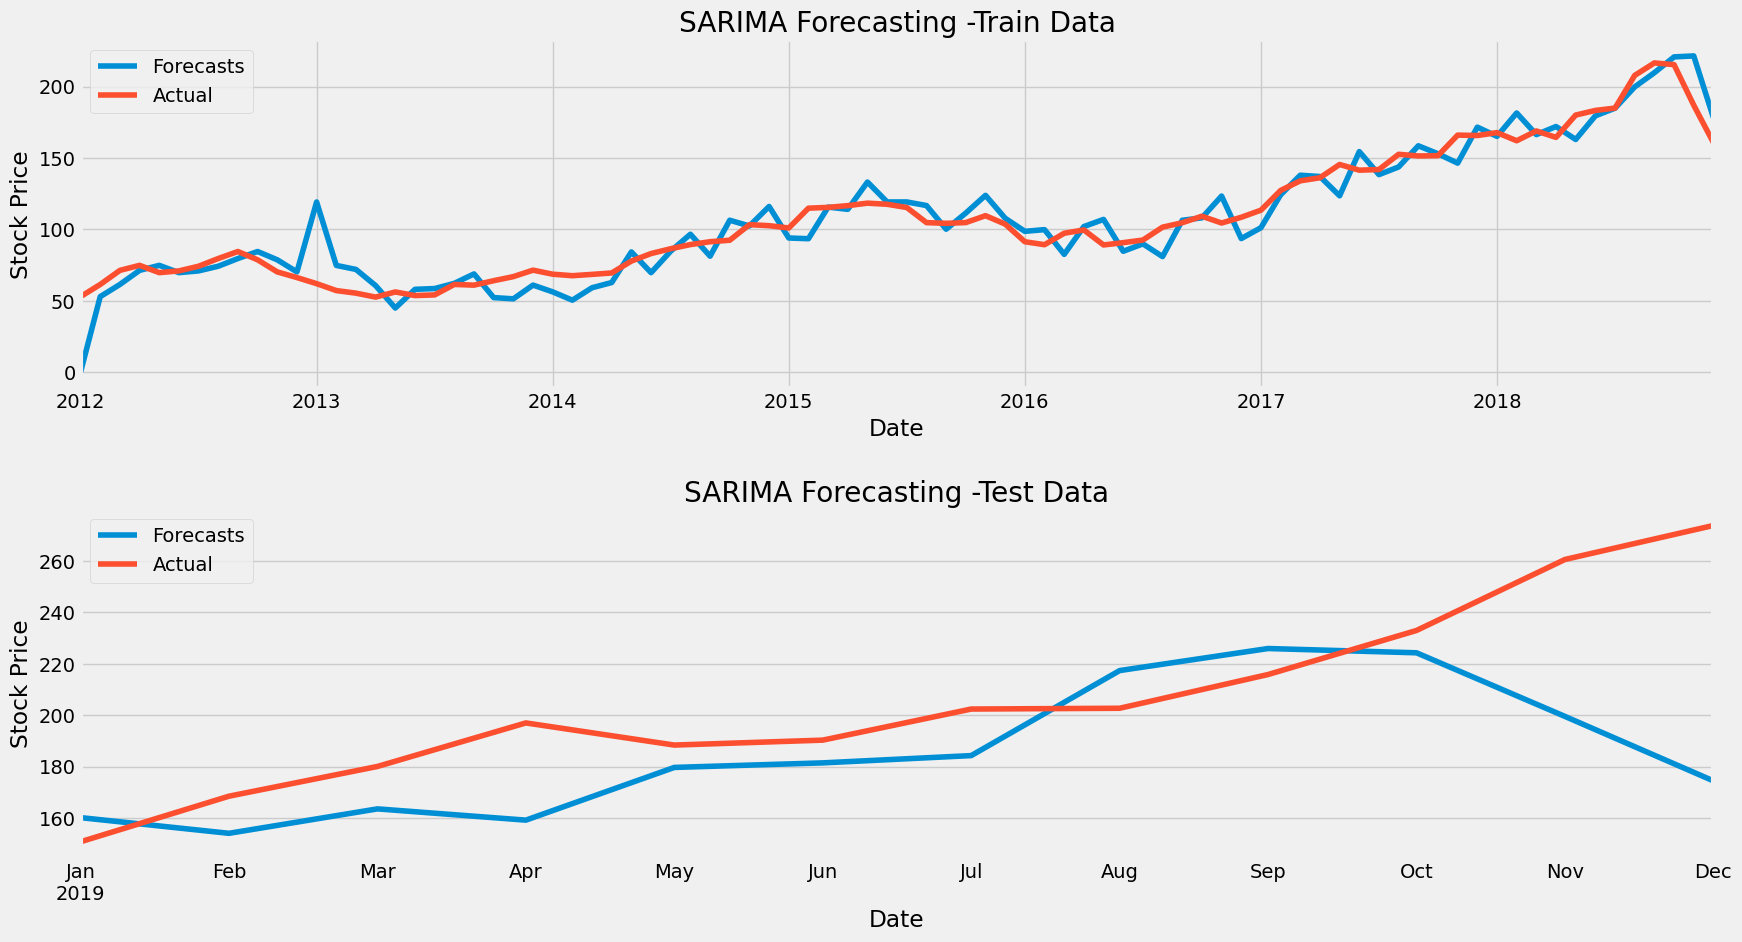

In [42]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

forecasts_train.plot(label='Forecasts',ax=ax1,title='SARIMA Forecasting -Train Data')
training.plot(label='Actual',ax=ax1)
ax1.set_ylabel('Stock Price')

forecasts_test.plot(label='Forecasts',ax=ax2,title='SARIMA Forecasting -Test Data')
testing.plot(label='Actual',ax=ax2)
ax2.set_ylabel('Stock Price')

ax1.legend()
ax2.legend()
plt.tight_layout(pad=2)

In [43]:
print(results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                           Adj Close   No. Observations:                   84
Model:             SARIMAX(1, 1, 1)x(2, 2, [], 12)   Log Likelihood                -230.612
Date:                             Sun, 23 Feb 2025   AIC                            471.224
Time:                                     19:03:19   BIC                            481.612
Sample:                                 01-31-2012   HQIC                           475.279
                                      - 12-31-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0823      0.601      0.137      0.891      -1.096       1.261
ma.L1          0.2325      

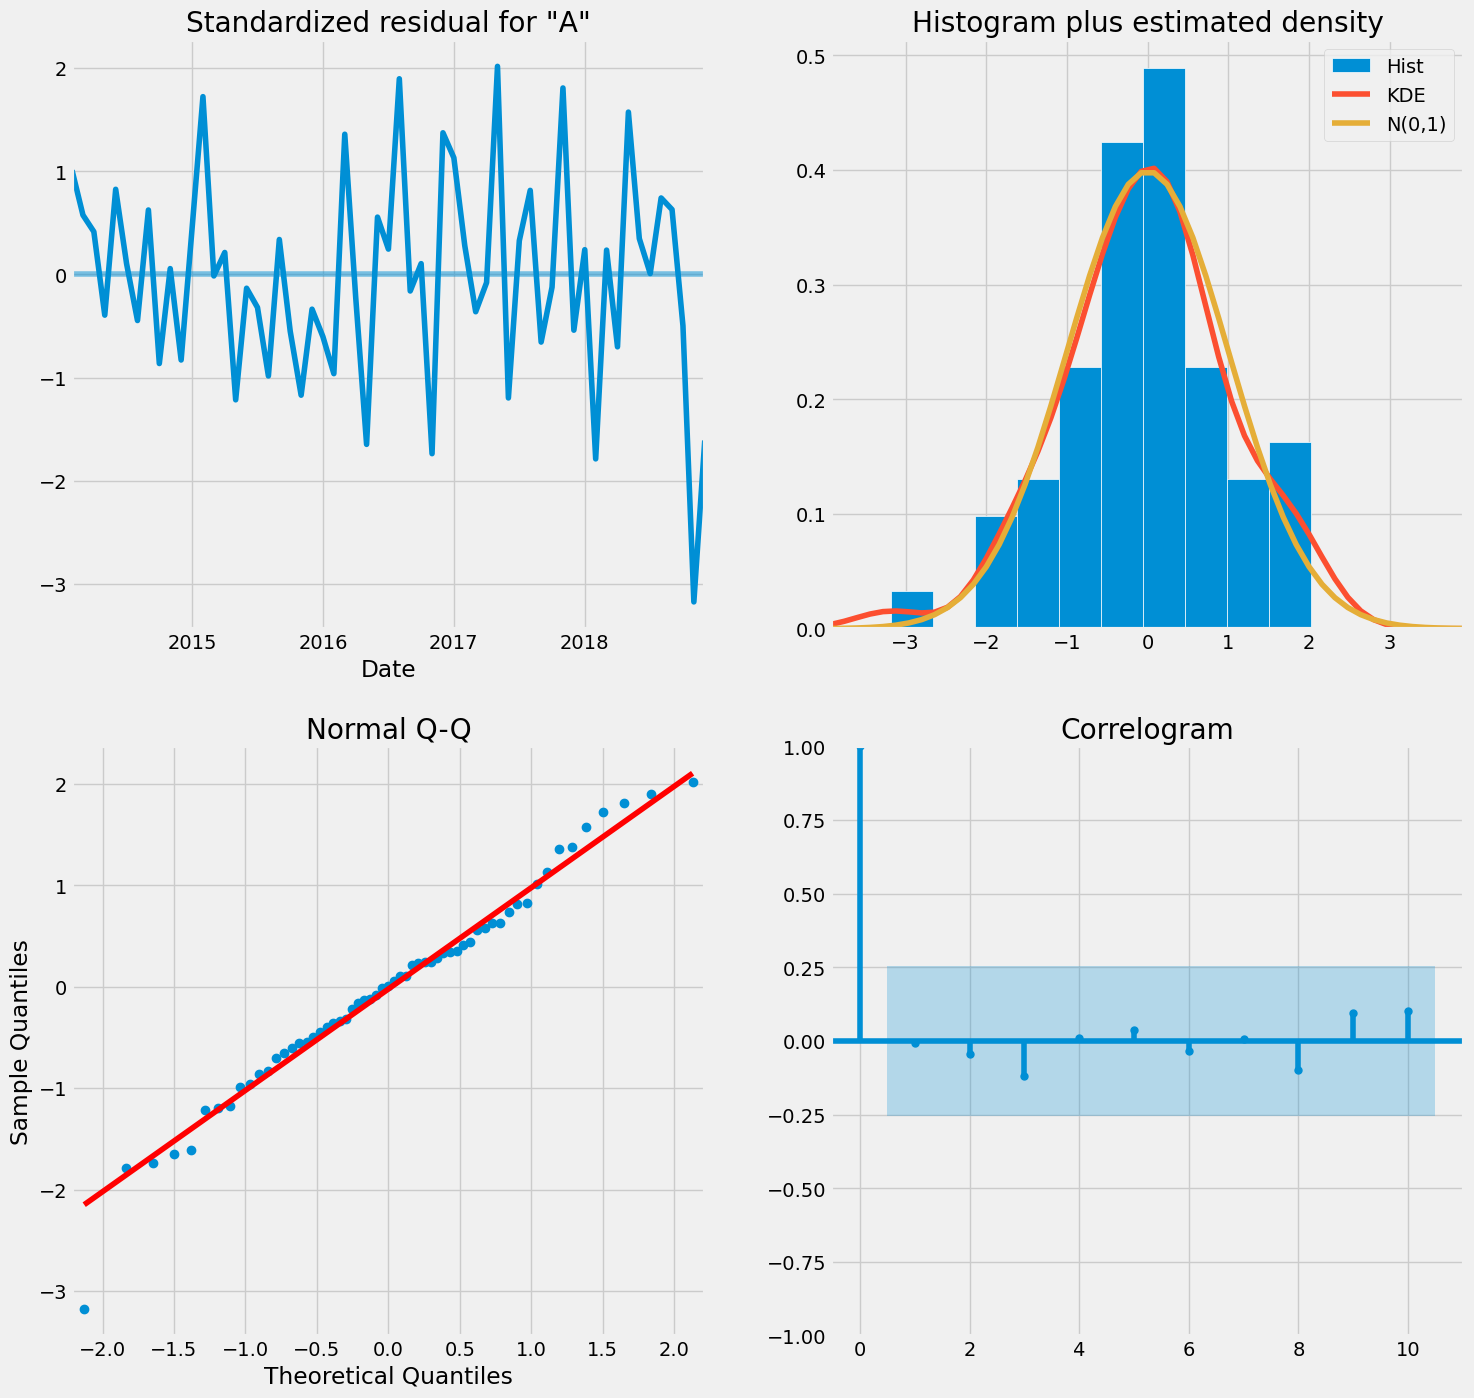

In [44]:
##Checking Model Diagnotics on Training Data
results.plot_diagnostics(figsize=(16, 16))
plt.show()

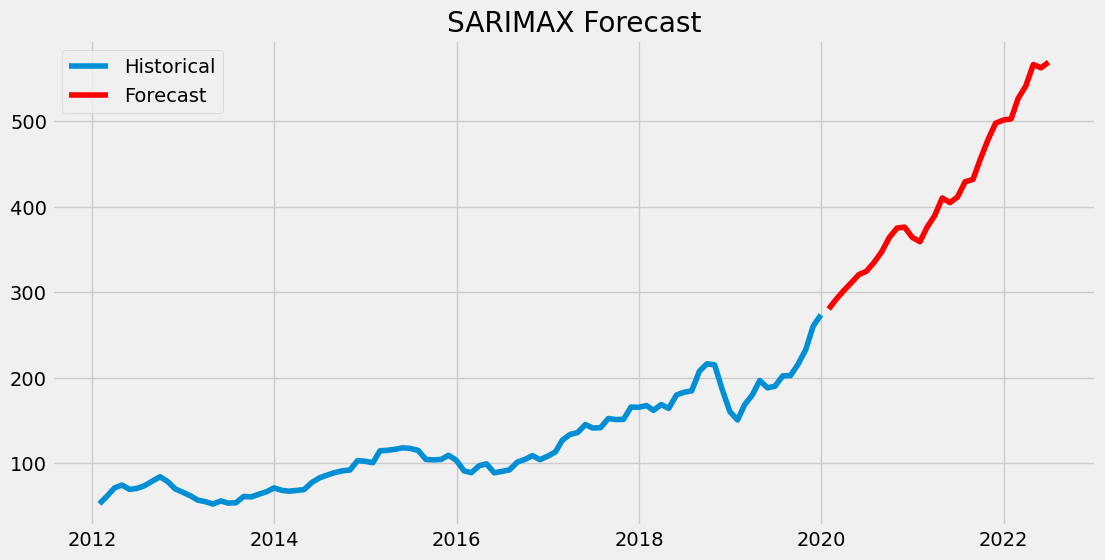

In [45]:
#Forcasting next 30 values
model = SARIMAX(monthly_data,order=(1,1,1),seasonal_order=(2,2,0,12))
results_final=model.fit()
forecast = results_final.forecast(steps=30)
plt.figure(figsize=(12, 6))
plt.plot(monthly_data, label='Historical') # plot for historical values
plt.plot(forecast, label='Forecast', color='red') # plot fot forcasted values
plt.title('SARIMAX Forecast')
plt.legend()
plt.show()

In [47]:
pip install streamlit scikit-learn pandas numpy 


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
import joblib

joblib.dump(results_final, 'timeseries.pkl')

['timeseries.pkl']